<a href="https://colab.research.google.com/github/pedrotokushiro/Machinelearningtools/blob/main/Copy_of_Part_2_CodeP4_1F21_Pedro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
'''>>>>> start CodeP4.1F21
    V.P. Carey ME249, Fall 2021

Intro to Neural Network Modeling 
Keras model for PV power system'''

#import useful packages
import keras
import pandas as pd
from keras.models import Sequential
import numpy as np
import keras.backend as kb
import tensorflow as tf
#the follwoing 2 lines are only needed for Mac OS machines
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

xdata = []
ydata = []

#xdata.append([qflux1 (W/m^2), qflux2 (W/m^2), separation distance (m)])
xdata.append([200.0,  100.0, 0.000])
xdata.append([200.0,  400.0, 0.000])
xdata.append([200.0,  200.0, 0.000])
xdata.append([500.0,  400.0, 0.000])
xdata.append([100.0,  300.0, 0.000])
xdata.append([600.0,  300.0, 0.002])
xdata.append([500.0,  400.0, 0.002])
xdata.append([200.,  400.0, 0.002])
xdata.append([100.0,  300.0, 0.002])
xdata.append([200.0,  200.0, 0.002])
xdata.append([200.0,  100.0, 0.002])
xdata.append([100.0,  200.0, 0.002])
xdata.append([500.0,  400.0, 0.004])
xdata.append([300.0,  400.0, 0.004])
xdata.append([200.0,  400.0, 0.004])
xdata.append([100.0,  400.0, 0.004])
xdata.append([100.0,  300.0, 0.004])
xdata.append([200.0,  300.0, 0.004])
xdata.append([500.0,  300.0, 0.004])
xdata.append([200.0,  100.0, 0.004])
xdata.append([100.0,  200.0, 0.004])
xdata.append([200.0,  200.0, 0.004])
xdata.append([300.0,  200.0, 0.004])
xdata.append([100.0,  300.0, 0.006])
xdata.append([200.0,  400.0, 0.006])
xdata.append([400.0,  200.0, 0.006])
xdata.append([600.0,  300.0, 0.006])
xdata.append([300.0,  600.0, 0.006])
xdata.append([200.0,  100.0, 0.006])
xdata.append([100.0,  200.0, 0.006])
xdata.append([50.0,  200.0, 0.006])
xdata.append([350.0,  150.0, 0.004])
xdata.append([350.0,  150.0, 0.008])
xdata.append([300.0,  200.0, 0.008])
xdata.append([200.0,  100.0, 0.008])
xdata.append([250.0,  50.0, 0.008])
xdata.append([50.0,  250.0, 0.008])
xdata.append([400.0,  300.0, 0.008])
xdata.append([500.0,  400.0, 0.008])
xdata.append([50.0,  200.0, 0.010])
xdata.append([100.0,  200.0, 0.010])
xdata.append([200.0,  200.0, 0.010])
xdata.append([300.0,  200.0, 0.010])
xdata.append([500.0,  400.0, 0.010])
xdata.append([400.0,  300.0, 0.010])
xdata.append([100.0,  100.0, 0.010])
xdata.append([200.0,  100.0, 0.010])

#ydata.append([maximum surface temperature (deg C)])
ydata.append([54.3])
ydata.append([72.2])
ydata.append([56.0])
ydata.append([77.2])
ydata.append([62.8])
ydata.append([84.6])
ydata.append([77.2])
ydata.append([71.6])
ydata.append([62.4])
ydata.append([55.3])
ydata.append([54.3]) 
ydata.append([55.5]) 
ydata.append([77.2])
ydata.append([72.2])
ydata.append([71.1])
ydata.append([70.2])
ydata.append([62.2])
ydata.append([63.2])
ydata.append([77.2])
ydata.append([54.3]) 
ydata.append([55.2])
ydata.append([56.4])
ydata.append([61.4])
ydata.append([62.0])
ydata.append([70.8])
ydata.append([69.5])
ydata.append([84.6])
ydata.append([86.4])
ydata.append([54.3])
ydata.append([55.0]) 
ydata.append([54.6])
ydata.append([65.5])
ydata.append([65.5])
ydata.append([61.4])
ydata.append([54.3])
ydata.append([57.1])
ydata.append([57.4])
ydata.append([69.5])
ydata.append([77.2])
ydata.append([54.5])
ydata.append([54.8])
ydata.append([55.5]) 
ydata.append([61.4])
ydata.append([77.2])
ydata.append([69.5])
ydata.append([44.9]) 
ydata.append([54.3]) 


xarray= np.array(xdata)
yarray= np.array(ydata)

print(xdata)
print(xarray)
print(ydata)
print(yarray)



####################### Normalization #########################

# normalization of input data

q1 = xarray[:, 0]
q2 = xarray[:, 1]
dxs = xarray[:, 2]

print(q1)
print(q2)
print(dxs)

q1_median = np.median(q1)
q2_median = np.median(q2)
dxs_median = np.median(dxs)

print(q1_median)
print(q2_median)
print(dxs_median)

xarray[:,0] = q1 / q1_median
xarray[:,1] = q2 / q2_median
xarray[:,2] = dxs / dxs_median

print(xarray)


# normalization of output data

Tsmax_median = np.median(yarray)

print(Tsmax_median)

yarray = yarray / Tsmax_median

print(yarray)




####################### Random separation #########################

import random

#input
print(len(xarray))
random.shuffle(xarray)

train_datax = xarray[:35]
test_datax = xarray[35:]

print(train_datax)
print(test_datax)

xarray = train_datax
xT = train_datax
xV = test_datax

#output
print(len(yarray))
random.shuffle(yarray)

train_datay = yarray[:35]
test_datay = yarray[35:]

print(train_datay)
print(test_datay)

yarray = train_datay
yT = train_datay
yV = test_datay



[[200.0, 100.0, 0.0], [200.0, 400.0, 0.0], [200.0, 200.0, 0.0], [500.0, 400.0, 0.0], [100.0, 300.0, 0.0], [600.0, 300.0, 0.002], [500.0, 400.0, 0.002], [200.0, 400.0, 0.002], [100.0, 300.0, 0.002], [200.0, 200.0, 0.002], [200.0, 100.0, 0.002], [100.0, 200.0, 0.002], [500.0, 400.0, 0.004], [300.0, 400.0, 0.004], [200.0, 400.0, 0.004], [100.0, 400.0, 0.004], [100.0, 300.0, 0.004], [200.0, 300.0, 0.004], [500.0, 300.0, 0.004], [200.0, 100.0, 0.004], [100.0, 200.0, 0.004], [200.0, 200.0, 0.004], [300.0, 200.0, 0.004], [100.0, 300.0, 0.006], [200.0, 400.0, 0.006], [400.0, 200.0, 0.006], [600.0, 300.0, 0.006], [300.0, 600.0, 0.006], [200.0, 100.0, 0.006], [100.0, 200.0, 0.006], [50.0, 200.0, 0.006], [350.0, 150.0, 0.004], [350.0, 150.0, 0.008], [300.0, 200.0, 0.008], [200.0, 100.0, 0.008], [250.0, 50.0, 0.008], [50.0, 250.0, 0.008], [400.0, 300.0, 0.008], [500.0, 400.0, 0.008], [50.0, 200.0, 0.01], [100.0, 200.0, 0.01], [200.0, 200.0, 0.01], [300.0, 200.0, 0.01], [500.0, 400.0, 0.01], [400.0

In [ ]:
# define neural network model

#As seen below, we have created four dense layers. 
#A dense layer is a layer in neural network that’s fully connected. 
#In other words, all the neurons in one layer are connected to all other neurons in the next layer.
#In the first layer, we need to provide the input shape, which is 1 in our case. 
#The activation function we have chosen is elu, which stands for exponential linear unit. .

from keras import backend as K
#initialize weights with values between -0.2 and 0.5
initializer = keras.initializers.RandomUniform(minval= -0.4089, maxval=0.583)

model = keras.Sequential([
    keras.layers.Dense(6, activation=K.elu, input_shape=[3],  kernel_initializer=initializer),
    keras.layers.Dense(8, activation=K.elu,  kernel_initializer=initializer),
    keras.layers.Dense(16, activation=K.elu, kernel_initializer=initializer),
    keras.layers.Dense(8, activation=K.elu, kernel_initializer=initializer),
    keras.layers.Dense(1,  kernel_initializer=initializer)
  ])

In [ ]:
#We’re using RMSprop as our optimizer here. RMSprop stands for Root Mean Square Propagation. 
#It’s one of the most popular gradient descent optimization algorithms for deep learning networks. 
#RMSprop is an optimizer that’s reliable and fast.
#We’re compiling the mode using the model.compile function. The loss function used here 
#is mean squared error. After the compilation of the model, we’ll use the fit method with ~500 epochs.
#Number of epochs can be varied.

#from tf.keras import optimizers
rms = tf.keras.optimizers.RMSprop(0.00009)
model.compile(loss='mean_absolute_error',optimizer=rms)

In [ ]:

#After the compilation of the model, we’ll use the fit method with 500 epochs.
#I started with epochs value of 100 and then tested the model after training. 
#The prediction was not that good. Then I modified the number of epochs to 200 and tested the model again. 
#Accuracy had improved slightly, but figured I’d give it one more try. Finally, at 500 epochs 
#I found acceptable prediction accuracy.

#The fit method takes three parameters; namely, x, y, and number of epochs. 
#During model training, if all the batches of data are seen by the model once, 
#we say that one epoch has been completed.

# Add an early stopping callback
es = keras.callbacks.EarlyStopping(
    monitor='loss', 
    mode='min', 
    patience = 2000, 
    restore_best_weights = True, 
    verbose=1)
# Add a checkpoint where loss is minimum, and save that model
mc = keras.callbacks.ModelCheckpoint('best_model.SB', monitor='loss', 
                     mode='min',  verbose=1, save_best_only=True)

historyData = model.fit(xarray,yarray,epochs=3000,callbacks=[es])

loss_hist = historyData.history['loss']
#The above line will return a dictionary, access it's info like this:
best_epoch = np.argmin(historyData.history['loss']) + 1
print ('best epoch = ', best_epoch)
print('smallest loss =', np.min(loss_hist))

model.save('./best_model')

Streaming output truncated to the last 5000 lines.
2/2 [==============================] - 0s 3ms/step - loss: 0.0570
Epoch 503/3000
2/2 [==============================] - 0s 4ms/step - loss: 0.0570
Epoch 504/3000
2/2 [==============================] - 0s 3ms/step - loss: 0.0570
Epoch 505/3000
2/2 [==============================] - 0s 3ms/step - loss: 0.0570
Epoch 506/3000
2/2 [==============================] - 0s 4ms/step - loss: 0.0570
Epoch 507/3000
2/2 [==============================] - 0s 5ms/step - loss: 0.0570
Epoch 508/3000
2/2 [==============================] - 0s 3ms/step - loss: 0.0570
Epoch 509/3000
2/2 [==============================] - 0s 3ms/step - loss: 0.0570
Epoch 510/3000
2/2 [==============================] - 0s 3ms/step - loss: 0.0570
Epoch 511/3000
2/2 [==============================] - 0s 3ms/step - loss: 0.0570
Epoch 512/3000
2/2 [==============================] - 0s 3ms/step - loss: 0.0570
Epoch 513/3000
2/2 [==============================] - 0s 5ms/step - loss:

In [ ]:


# This line of code can be used to reconstruct the saved model.

recon_model = keras.models.load_model("best_model")

# the name of the model is now "recon_model". You can then use this model to do predictions for comparisons.
# See the previous project for code to do the comparisons.








OSError: ignored

In [ ]:
#Construction: lists of Tsmax data and Tsmax prediction - TRAINING set

DATA = []
PRED = []

e = 0

for i in range(0,len(xT)): 
    test = [[xT[i][0], xT[i][1], xT[i][2]]]
    testarray = np.array(test)
    Tsmax_model = recon_model.predict(testarray)
    DATA += [yT[i][0]*Tsmax_median]
    PRED += [Tsmax_model[0][0]*Tsmax_median]
    e += abs(DATA[i]-PRED[i])
    
MAE_T = e/len(xT)

In [ ]:
print('Max temperature MAE (trainind set) =', MAE_T, "°C")

#to compare with the magnitude of Tsmax

print('percentage of error compared to the magnitude of the max temperature (%) =', MAE_T/Tsmax_median*100, '%')

Max temperature MAE (trainind set) = 3.54745395898819 °C
percentage of error compared to the magnitude of the max temperature (%) = 5.703302184868473 %


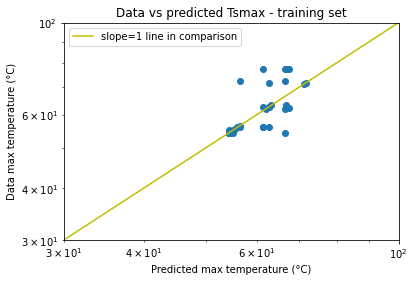

In [ ]:
# log-log plot - TRAINING set

import matplotlib.pyplot as plt

# slope 1 line
X=np.linspace(0,1000,2) 
Y=np.linspace(0,1000,2)

plt.scatter(PRED,DATA)
plt.title('Data vs predicted Tsmax - training set')
plt.xlabel('Predicted max temperature (°C)')
plt.ylabel('Data max temperature (°C)')
plt.loglog()

plt.xlim(xmax = 100, xmin = 30)
plt.ylim(ymax = 100, ymin = 30)
plt.plot(X,Y,'y', label='slope=1 line in comparison')

plt.legend()


plt.show()

In [ ]:
#Construction: lists of mdot data and mdot predictions - VALIDATION set

DATA = []
PRED = [] 

e = 0

for i in range(0,len(xV)): 
    test = [[xV[i][0], xV[i][1], xV[i][2]]]
    testarray = np.array(test)
    Tsmax_model = recon_model.predict(testarray)
    DATA += [yV[i][0]*Tsmax_median]
    PRED += [Tsmax_model[0][0]*Tsmax_median]
    e += abs(DATA[i]-PRED[i])

MAE_V = e/len(xV)

print(DATA)
print(PRED)

[57.1, 62.4, 57.1, 71.6, 86.4, 72.2, 77.2, 55.5, 62.8, 77.2, 77.2, 54.3]
[54.31532372236252, 71.6055184364319, 63.20685069561005, 67.47403385639191, 71.629638838768, 69.13870494365692, 71.56841468811035, 71.60614128112793, 71.50812480449677, 67.47403385639191, 71.44925856590271, 54.30945118665696]


In [ ]:
print('Max temperature MAE (validation set) =', MAE_V, "°C")

#to compare with the magnitude of Tsmax

print('percentage of error compared to the magnitude of the max temperature (%) =', MAE_V/Tsmax_median*100, '%')

Max temperature MAE (validation set) = 7.1655564943949415 °C
percentage of error compared to the magnitude of the max temperature (%) = 11.52018729002402 %


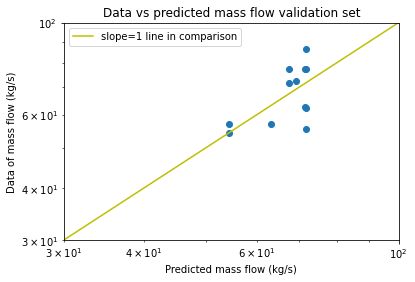

In [ ]:
# log-log plot - VALIDATION set

import matplotlib.pyplot as plt

X=np.linspace(0,1000,2)
Y=np.linspace(0,1000,2)

plt.scatter(PRED,DATA)
plt.title('Data vs predicted mass flow validation set')
plt.xlabel('Predicted mass flow (kg/s)')
plt.ylabel('Data of mass flow (kg/s)')
plt.loglog()

plt.xlim(xmax = 100, xmin = 30)
plt.ylim(ymax = 100, ymin = 30)
plt.plot(X,Y,'y', label='slope=1 line in comparison')

plt.legend()

plt.show()

In [ ]:
import numpy as np
#plt.figure(figsize=(20,10))

q1 = np.linspace(100,500,47)
q2 = q1
Di = np.linspace(0,15,47)

x_med = [q1_median , q2_median , dxs_median]
x_med = np.array(x_med)

#xdata.append([qflux1 (W/m^2), qflux2 (W/m^2), separation distance (m)])


Tmax = np.zeros((len(q1) ,len(Di)))


for i in range(len(Di)):
  for j in range(len(q1)):
    output = recon_model.predict(np.array([[q1[j],q2[j],Di[i]/1000]/x_med]))
    Tmax[j][i] = output[0][0]*Tsmax_median


In [ ]:
print(Tmax)


[[54.10819449 54.30483917 54.69709786 ... 71.63865526 71.64061277
  71.64254804]
 [54.02353581 54.18960178 54.56717172 ... 71.63927069 71.64122078
  71.64314122]
 [53.96403931 54.08097841 54.43676361 ... 71.63990095 71.64183621
  71.64374924]
 ...
 [65.64932134 64.03788865 56.84780284 ... 71.6796592  71.68163896
  71.68360388]
 [65.6659157  64.0290576  56.77729163 ... 71.67967403 71.68165379
  71.68361871]
 [65.68550565 64.02362254 56.71208202 ... 71.67968144 71.68166862
  71.68363354]]


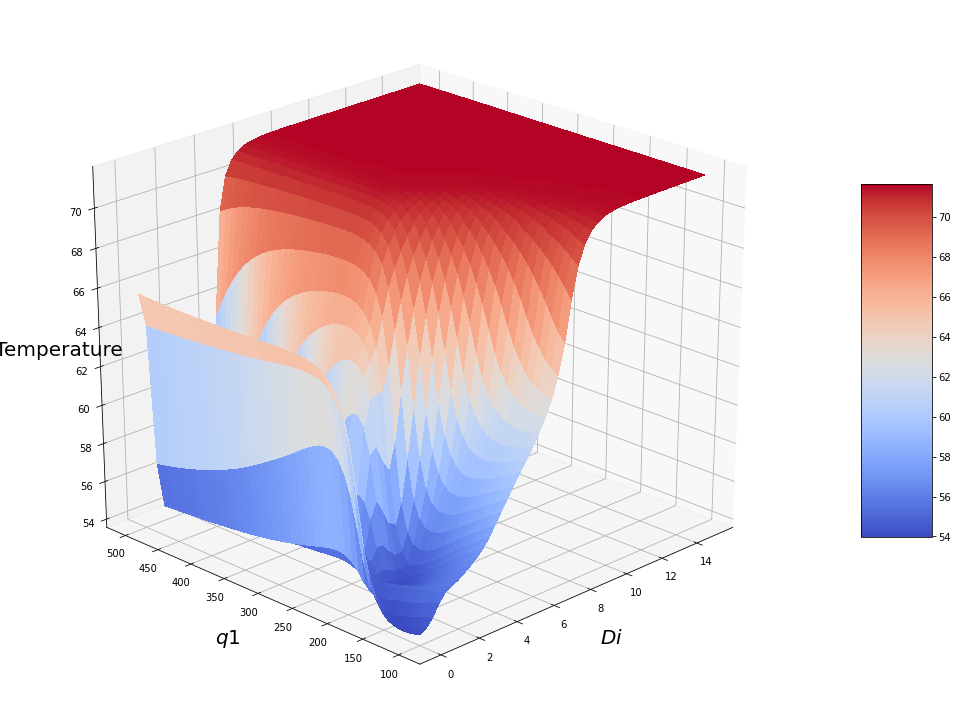

In [ ]:
import matplotlib.pyplot as plt

X, Y = np.meshgrid(Di,q1)

fig = plt.figure()
ax = fig.gca(projection = '3d')
fig.set_size_inches(18,13)

surf1 = ax.plot_surface(X, Y, Tmax, cmap=plt.cm.coolwarm, linewidth=0, antialiased = False)
fig.colorbar(surf1, shrink=0.5, aspect=5)
plt.xlabel(r'$Di$', fontsize=20, labelpad=15)
plt.ylabel(r'$q1$', fontsize=20, labelpad=15)
ax.zaxis.set_rotate_label(False)
ax.set_zlabel(r'Temperature', fontsize=20, rotation=0)
ax.view_init(25,-135)
plt.show()


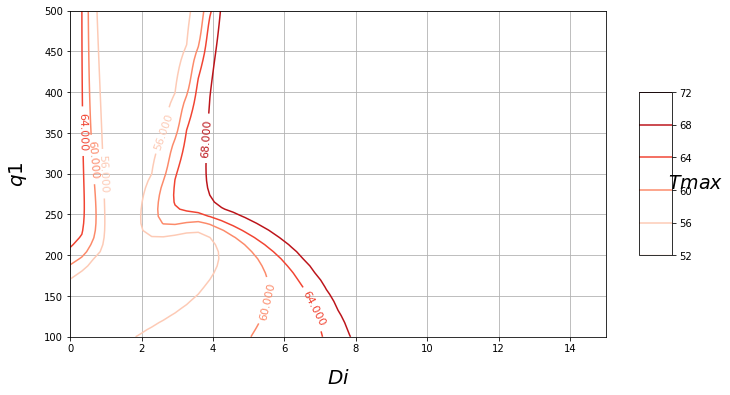

In [ ]:
fig = plt.figure()
fig.set_size_inches(12,6)

# contours_x = plt.contour(X,Y, Tmax, 6, cmap= plt.cm.Blues)
contours_Tmax = plt.contour(X,Y, Tmax, 4, cmap= plt.cm.Reds)

# plt.clabel(contours_x, inline=True, fontsize=11)
plt.clabel(contours_Tmax, inline=True, fontsize=11)
# cbar_x = plt.colorbar(contours_x, shrink=0.5, aspect=5)
# cbar_x.set_label('$x$', rotation=0, fontsize=19)
cbar_Tmax = plt.colorbar(contours_Tmax, shrink=0.5,aspect=5)
cbar_Tmax.set_label('$Tmax$', rotation=0, fontsize=19)


plt.xlabel(r'$Di$', fontsize=20, labelpad=15)
plt.ylabel(r'$q1$', fontsize=20, labelpad=15)
plt.grid()
plt. show()